In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart.csv

--2023-03-21 04:58:49--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.173, 108.157.172.10, 108.157.172.176, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  22.3MB/s    in 1.0s    

2023-03-21 04:58:50 (22.3 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("walmart.csv")

# Defining Problem Statement and Analyzing basic metrics

**Business Problem Statement**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

##### Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [ ]:
df.head() ## Checking what all variaables (Continuous and Categorial) are present in dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape  ## Checking the lenght (rows) and columns of the dataset

(550068, 10)

In [ ]:
df.info()  ## Checking the datatypes to make necessary changes if required.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isna().sum() ## Checking the Null Values. Data Seems to be clean, no need to impute the null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum() ## See if there is any data duplication

0

In [ ]:
df.describe(include='all').T  ## Statistical Summary on the dataset

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


####Non-Graphical Analysis: Value counts and unique attributes ​

In [ ]:
attributes = df.columns.tolist()

In [ ]:
## let us see unique values and count of unique values for each column
for i in attributes: 
  print(f"Unique attributes for {i} column: {df[i].unique()}" )
  print(f"Unique counts for {i} column: {df[i].nunique()}" )
  print ("-"*150)

Unique attributes for User_ID column: [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique counts for User_ID column: 5891
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique attributes for Product_ID column: ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique counts for Product_ID column: 3631
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique attributes for Gender column: ['F' 'M']
Unique counts for Gender column: 2
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique attributes for Age column: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique counts for Age column: 7
---------------------------------------------------

In [ ]:
## Value Counts for all attributes shown below

In [ ]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
df['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

Visual Analysis - Univariate & Bivariate

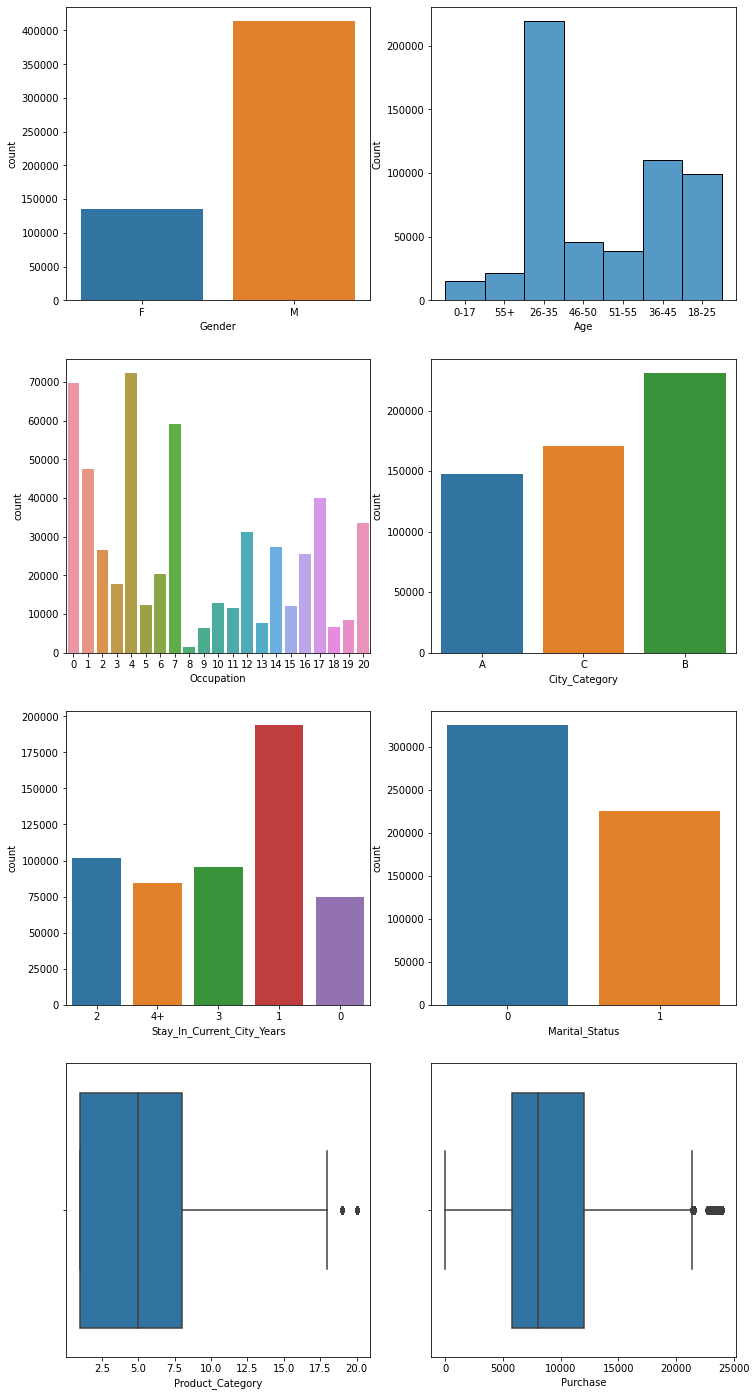

In [ ]:
## Univariate Visual Analysis
plt.figure(figsize=(12,10))
plt.subplots_adjust(top=2)

plt.subplot(4,2,1)
sns.countplot(df, x='Gender')

plt.subplot (4,2,2)
sns.histplot(df['Age'])

plt.subplot (4,2,3)
sns.countplot(x=df['Occupation'])

plt.subplot (4,2,4)
sns.countplot(x=df['City_Category'])


plt.subplot (4,2,5)
sns.countplot(x=df['Stay_In_Current_City_Years'])

plt.subplot (4,2,6)
sns.countplot(x=df['Marital_Status'])

plt.subplot (4,2,7)
sns.boxplot(x=df['Product_Category'])

plt.subplot (4,2,8)
sns.boxplot(x=df['Purchase'])

plt.show()

In [ ]:
## Bivariate

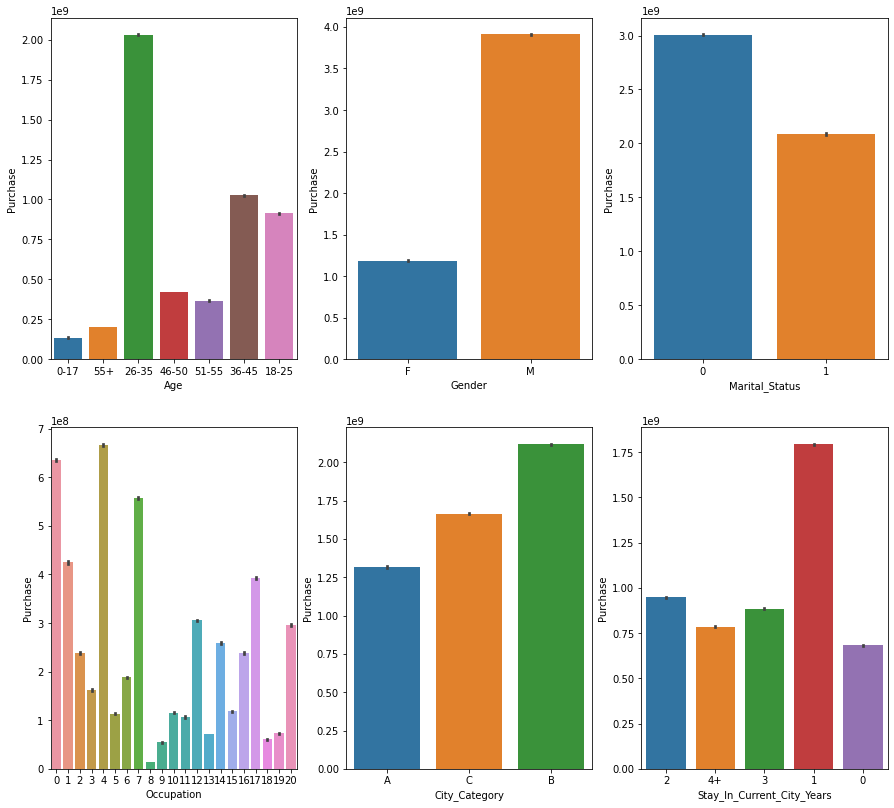

In [ ]:
## Here plotting data taking into consideration the total sum of amount spent
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=1.2)

plt.subplot(3,3,1)
sns.barplot(df, x='Age', y='Purchase', estimator = np.sum)

plt.subplot(3,3,2)
sns.barplot(df, x='Gender', y='Purchase', estimator = np.sum)

plt.subplot(3,3,3)
sns.barplot(df, x='Marital_Status', y='Purchase', estimator = np.sum)

plt.subplot(3,3,4)
sns.barplot(df, x='Occupation', y='Purchase', estimator = np.sum)

plt.subplot(3,3,5)
sns.barplot(df, x='City_Category', y='Purchase', estimator = np.sum)

plt.subplot(3,3,6)
sns.barplot(df, x='Stay_In_Current_City_Years', y='Purchase', estimator = np.sum)

plt.show()

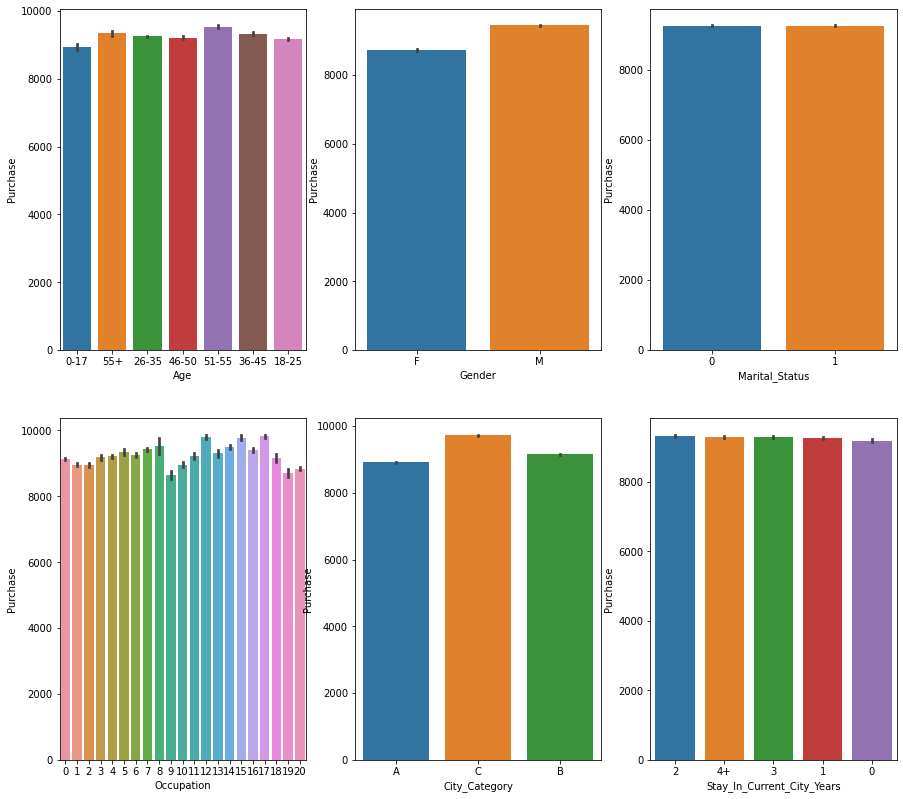

In [ ]:
## Here plotting data taking into consideration the average of amount spent
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=1.2)

plt.subplot(3,3,1)
sns.barplot(df, x='Age', y='Purchase', estimator = np.mean)

plt.subplot(3,3,2)
sns.barplot(df, x='Gender', y='Purchase', estimator = np.mean)

plt.subplot(3,3,3)
sns.barplot(df, x='Marital_Status', y='Purchase', estimator = np.mean)

plt.subplot(3,3,4)
sns.barplot(df, x='Occupation', y='Purchase', estimator = np.mean)

plt.subplot(3,3,5)
sns.barplot(df, x='City_Category', y='Purchase', estimator = np.mean)

plt.subplot(3,3,6)
sns.barplot(df, x='Stay_In_Current_City_Years', y='Purchase', estimator = np.mean)

plt.show()

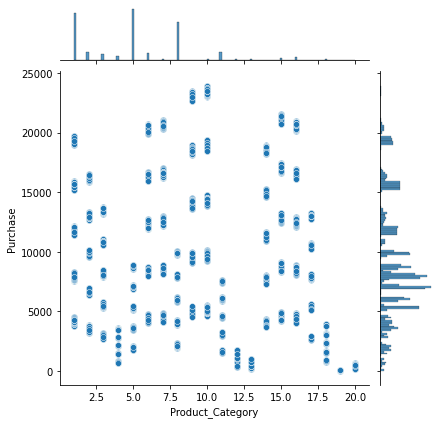

In [ ]:
sns.jointplot(x ='Product_Category', y='Purchase', data=df)
plt.show()

In [ ]:
## Multivariate Analysis

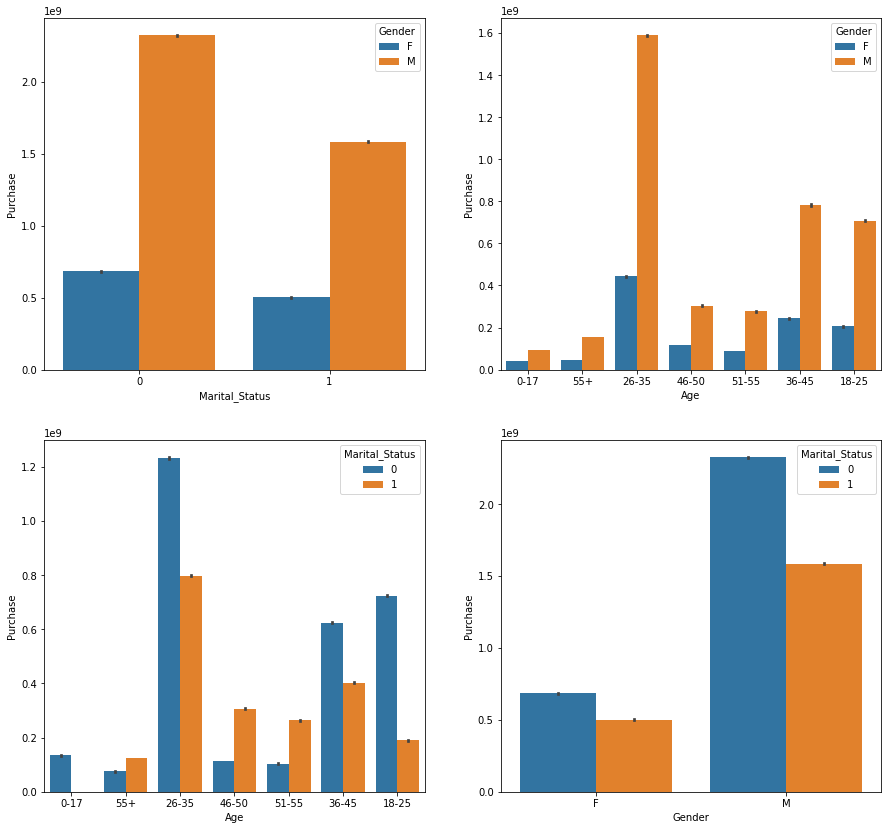

In [ ]:
## Taking into consideration the total sum of amount spent
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.2)

plt.subplot(2,2,1)
sns.barplot(df, x='Marital_Status', y='Purchase', hue='Gender', estimator = np.sum)

plt.subplot(2,2,2)
sns.barplot(df, x='Age', y='Purchase', hue='Gender', estimator = np.sum)

plt.subplot(2,2,3)
sns.barplot(df, x='Age', y='Purchase', hue='Marital_Status', estimator = np.sum)

plt.subplot(2,2,4)
sns.barplot(df, x='Gender', y='Purchase', hue='Marital_Status', estimator = np.sum)

plt.show()

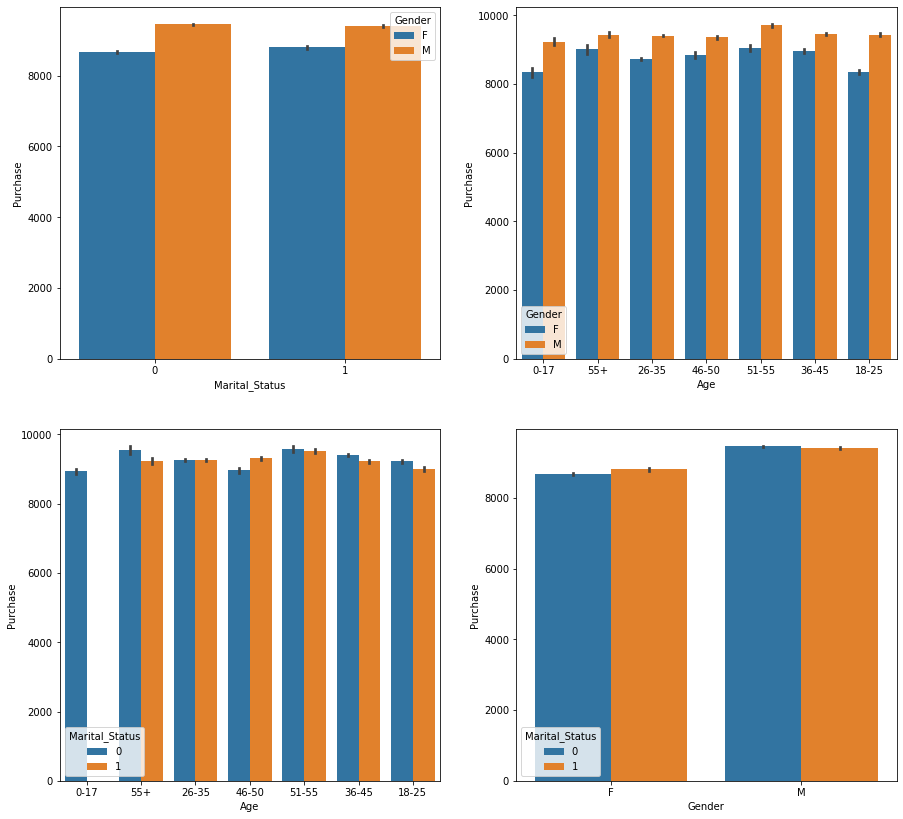

In [ ]:
## Taking into consideration the average amount spent
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.2)

plt.subplot(2,2,1)
sns.barplot(df, x='Marital_Status', y='Purchase', hue='Gender', estimator = np.mean)

plt.subplot(2,2,2)
sns.barplot(df, x='Age', y='Purchase', hue='Gender', estimator = np.  mean)

plt.subplot(2,2,3)
sns.barplot(df, x='Age', y='Purchase', hue='Marital_Status', estimator = np.mean)

plt.subplot(2,2,4)
sns.barplot(df, x='Gender', y='Purchase', hue='Marital_Status', estimator = np.mean)

plt.show()

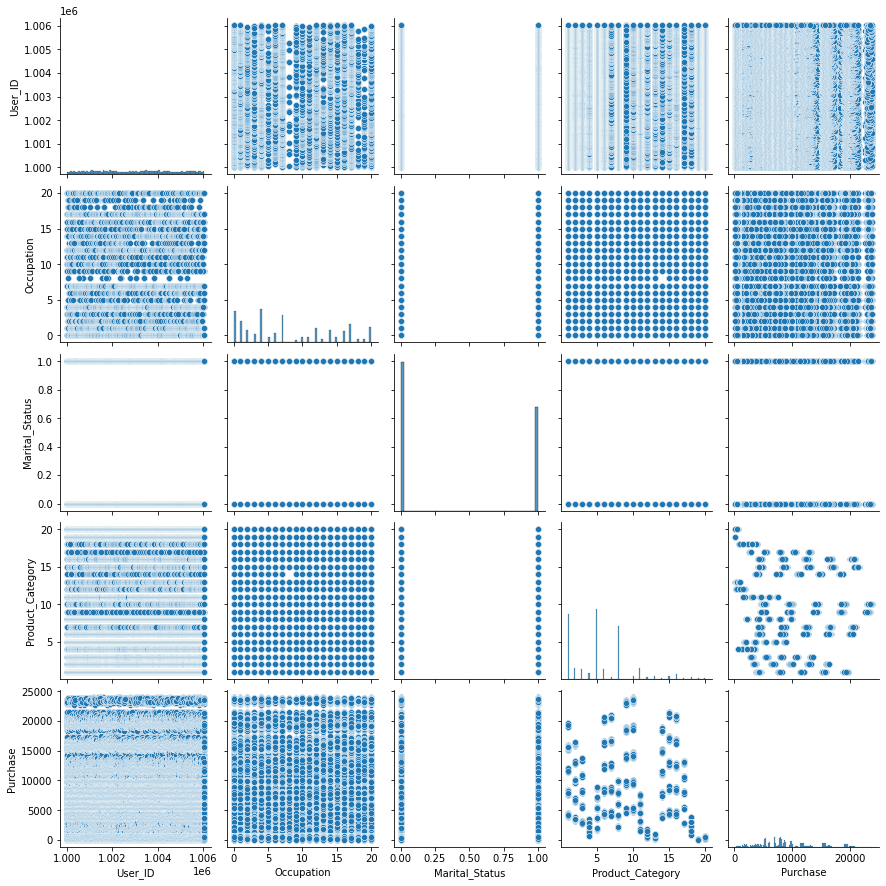

In [ ]:
sns.pairplot(df)
plt.show()

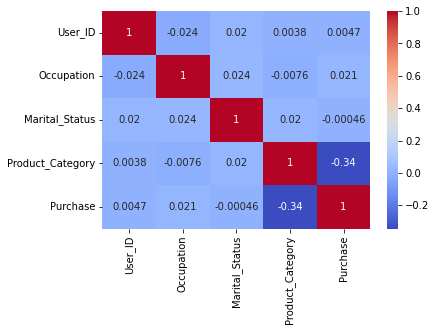

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

# Missing Value & Outlier Detection 

In [ ]:
df.info() ## The data seems clean as we don't have any non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
##taking extra steps to make sure if object datatype has 'nan' or 'NAN'

In [ ]:
np.all(df['Age'].str.contains('nan','NAN'))

False

In [ ]:
np.all(df['Gender'].str.contains('nan','NAN'))

False

In [ ]:
np.all(df['Product_ID'].str.contains('nan','NAN'))

False

In [ ]:
np.all(df['City_Category'].str.contains('nan','NAN'))

False

In [ ]:
np.all(df['Stay_In_Current_City_Years'].str.contains('nan','NAN'))

False

In [ ]:
## Since there are no missing values, let us try detect outliers using box plot

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


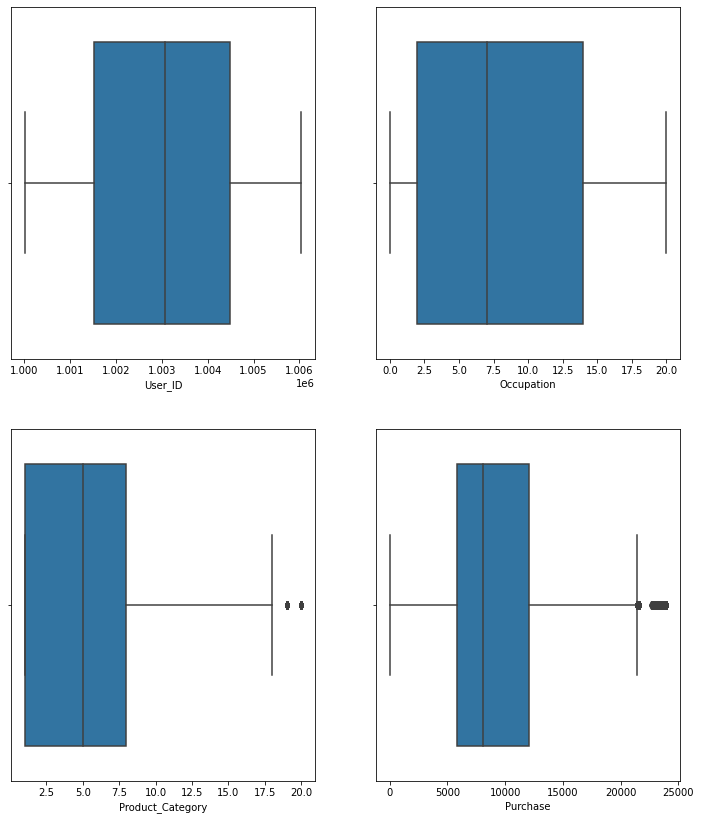

In [ ]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(top=1.2)

plt.subplot(2,2,1)
sns.boxplot(data= df, x='User_ID', orient='h')


plt.subplot(2,2,2)
sns.boxplot(data= df, x='Occupation', orient='h')

plt.subplot(2,2,3)
sns.boxplot(data= df, x='Product_Category', orient='h')

plt.subplot(2,2,4)
sns.boxplot(data= df, x='Purchase', orient='h')
plt.show()

In [ ]:
## Using IQR

out_data = ['User_ID','Occupation', 'Product_Category', 'Purchase']

for i in range (4):
  x_25 = np.percentile(df[out_data[i]],25)
  x_75 = np.percentile(df[out_data[i]],75)
  iqr = x_75 - x_25
  lower_limit = max(x_25 - 1.5*(iqr),0)
  upper_limit = x_75 + 1.5*(iqr)
  print(f"Upper Limit of {out_data[i]}:{upper_limit} & Lower Limit of {out_data[i]}:{lower_limit}")
  print()

Upper Limit of User_ID:1008921.0 & Lower Limit of User_ID:997073.0

Upper Limit of Occupation:32.0 & Lower Limit of Occupation:0

Upper Limit of Product_Category:18.5 & Lower Limit of Product_Category:0

Upper Limit of Purchase:21400.5 & Lower Limit of Purchase:0



In [ ]:
##Using z score

out_data = ['User_ID','Occupation', 'Product_Category', 'Purchase']

for i in range (4):
  x_mean = df[out_data[i]].mean()
  x_std = df[out_data[i]].std()
  outlier = []
  for j in df[out_data[i]]:
    z = (j-x_mean) / x_std
    if z > 3 or z<-3:
      outlier.append(j)
  print(f"The outlier for {out_data[i]}: {np.unique(outlier)}")
  print()


The outlier for User_ID: []

The outlier for Occupation: []

The outlier for Product_Category: [18 19 20]

The outlier for Purchase: []



# Business Insights based on Non- Graphical and Visual Analysis

In [ ]:
## Comments on the range of attributes

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


Observation:

1) The max amount spent on Purchase is 23961 while minimum amount is 12.

2) The average amount spend is 9264

3) 75 % of the people have spent less than 12054

4) Lenght of data set is 550068

In [ ]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


Observation:

1) Male made most of the purchase

2) Frequent purchase are made from City B

3) People residing for 1 years are frequent to make purchases

4) Age group between 26-35 years made most of the purchase

In [ ]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


Observation:

1) Data are very less related to each other

2) Occupation seems to be mostly related to Marital Status

3) Choosing products seems to be factored by Marital Status

3) Purchase is dependent on Occupation

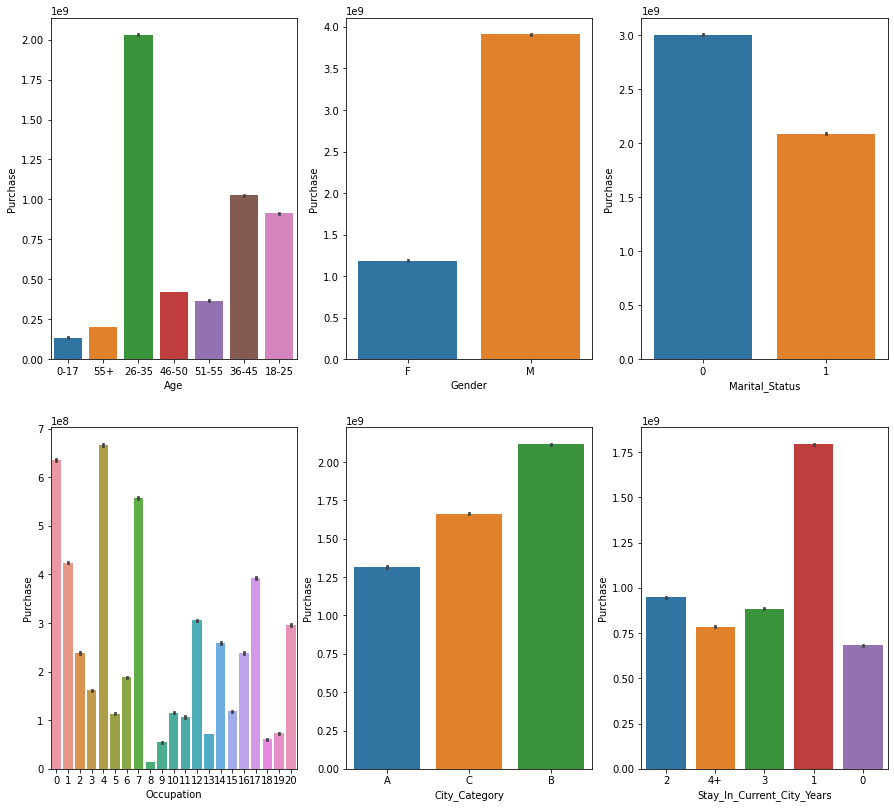

In [ ]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(top=1.2)

plt.subplot(3,3,1)
sns.barplot(df, x='Age', y='Purchase', estimator = np.sum)

plt.subplot(3,3,2)
sns.barplot(df, x='Gender', y='Purchase', estimator = np.sum)

plt.subplot(3,3,3)
sns.barplot(df, x='Marital_Status', y='Purchase', estimator = np.sum)

plt.subplot(3,3,4)
sns.barplot(df, x='Occupation', y='Purchase', estimator = np.sum)

plt.subplot(3,3,5)
sns.barplot(df, x='City_Category', y='Purchase', estimator = np.sum)

plt.subplot(3,3,6)
sns.barplot(df, x='Stay_In_Current_City_Years', y='Purchase', estimator = np.sum)

plt.show()

Observation: (The above graphs are made on basic of total amount spent)

1) Age 26-35 spents good amount to purchase product from Walmart

2)Male seems to be spending more

3) Marital status 0 spends lot on purchase

4) Occupation 4 followed by 0 and 7 spends good amount

5) City category B spends good amount

6) People staying for 1 year spends good amount

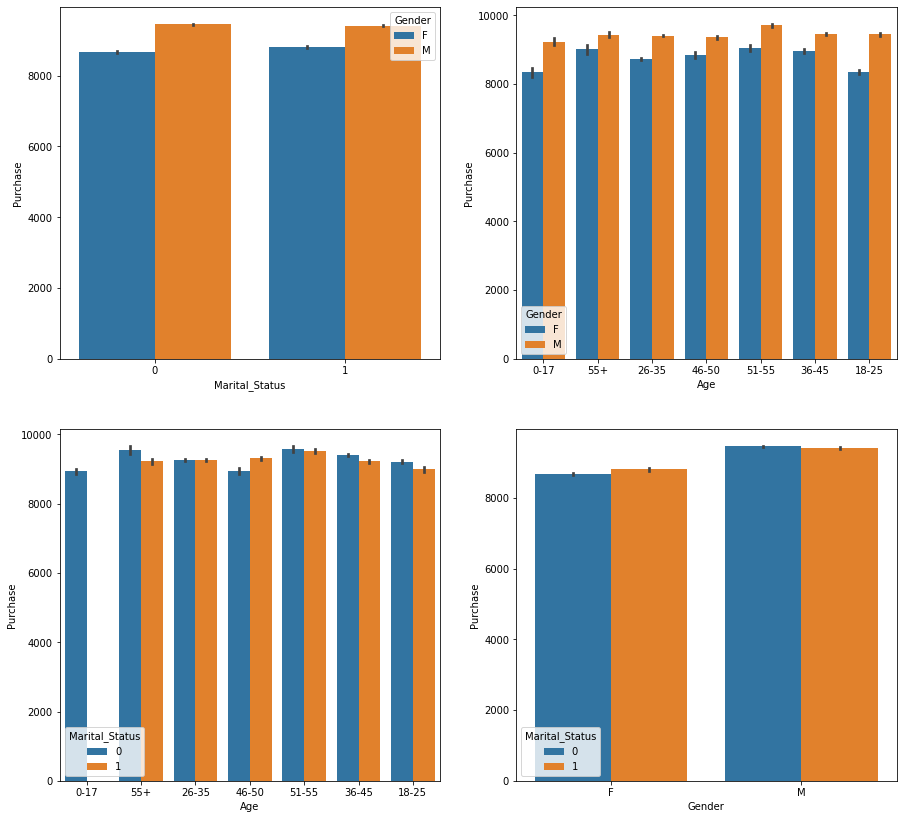

In [ ]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top=1.2)

plt.subplot(2,2,1)
sns.barplot(df, x='Marital_Status', y='Purchase', hue='Gender', estimator = np.mean)

plt.subplot(2,2,2)
sns.barplot(df, x='Age', y='Purchase', hue='Gender', estimator = np.  mean)

plt.subplot(2,2,3)
sns.barplot(df, x='Age', y='Purchase', hue='Marital_Status', estimator = np.mean)

plt.subplot(2,2,4)
sns.barplot(df, x='Gender', y='Purchase', hue='Marital_Status', estimator = np.mean)

plt.show()

Observation:
1) Man seems to dominate in terms of average spends

2) Marital status 1 spends more on an average

# Answering questions

In [ ]:
## 1) Are women spending more money per transaction than men? Why or Why not?

In [ ]:
print (f"Average Spend by Women: {round(df.loc[df['Gender']=='F']['Purchase'].mean(),2)}")
print (f"Average Spend by Men: {round(df.loc[df['Gender']=='M']['Purchase'].mean(),2)}")

Average Spend by Women: 8734.57
Average Spend by Men: 9437.53


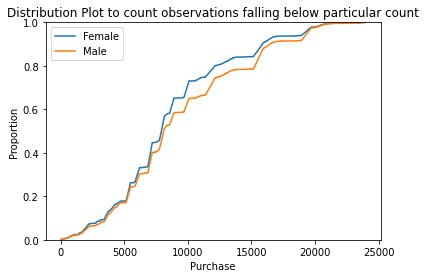

In [ ]:
sns.ecdfplot(df[df['Gender']=='F']['Purchase'], label='Female')
sns.ecdfplot(df[df['Gender']=='M']['Purchase'], label='Male')
plt.legend()
plt.title('Distribution Plot to count observations falling below particular count')
plt.show()

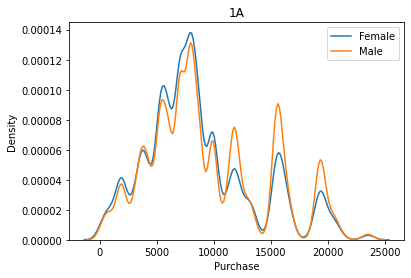

In [ ]:
sns.kdeplot(df[df['Gender']=='F']['Purchase'], label='Female')
sns.kdeplot(df[df['Gender']=='M']['Purchase'], label='Male')
plt.legend()
plt.title('1A')
plt.show()

In [ ]:
product_purchased_female= df.loc[(df['Gender']=='F') & (df['Purchase']<8000), ['Product_Category','Purchase']]

In [ ]:
product_purchased_female['Product_Category'].unique()

array([12,  5,  4,  8, 14, 13, 11,  1,  3,  2, 18,  6, 10, 15, 16, 17,  7,
        9, 20, 19])

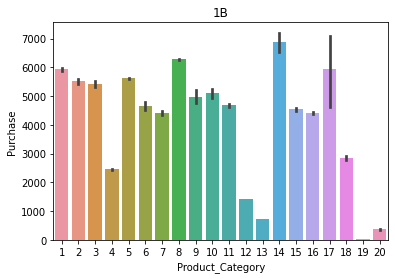

In [ ]:
sns.barplot(data=product_purchased_female, x='Product_Category', y ='Purchase', estimator =np.mean)
plt.title('1B')
plt.show()

In [ ]:
product_purchased_female.describe()

,Product_Category,Purchase
count,127257.000000,127257.000000
mean,5.792318,7984.778071
std,3.587445,3904.032403
min,1.000000,12.000000
25%,4.000000,5371.000000
50%,5.000000,7798.000000
75%,8.000000,9943.000000
max,20.000000,17418.000000


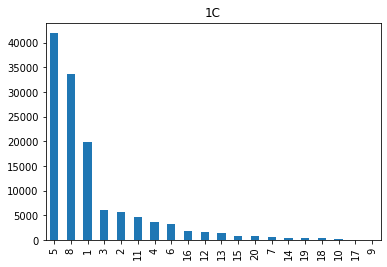

In [ ]:
product_purchased_female['Product_Category'].value_counts().plot(kind='bar')
plt.title('1C')
plt.show()

Based on above observation we can say that on an average men are spending more per transaction.
To explore more refer to the graph (1A) above where we can see that in transaction less than or equal to 7,500, women seems to be spending more.
Which may suggest that they may mostly be shopping for daily, weekly or monthly needs (Most of the product they purchased belong to Category 5, refer to (1C))

Also I did a little more exploration on woman spending below 7500 (1B & 1C), on an average they seem to spend around 5k, while the higest transaction on an average is made on product category 14.

In [ ]:
## 2) Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
print(f"The average spent/mean spent by men ={round(df[df['Gender']=='M']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by women ={round(df[df['Gender']=='F']['Purchase'].mean(),2)}")

The average spent/mean spent by men =9437.53
The average spent/mean spent by women =8734.57


In [ ]:
## Finding confidence interval using statsmodels.stats.api 
import statsmodels.stats.api as sms 

a = df[df['Gender']=='M']['Purchase']
b  = df[df['Gender']=='F']['Purchase']

print(f"Confidence interval mean of expenses by men is: {sms.DescrStatsW(a).tconfint_mean()}")
print(f"Confidence interval mean of expenses by women is: {sms.DescrStatsW(b).tconfint_mean()}")

Confidence interval mean of expenses by men is: (9422.019402055814, 9453.032678888716)
Confidence interval mean of expenses by women is: (8709.21132117373, 8759.92020913722)


In [ ]:
## Finding confidence interval using z score taking sample as 1000 ((Calculating at 95% of interval))

sample_man = df[df['Gender']=='M']['Purchase'].sample(1000)
sample_man_mean = sample_man.mean()
sample_man_std = sample_man.std()
margin_of_error = 1.959963984540054*sample_man_std/np.sqrt(len(sample_man)) ## z score is calculated with norm.stats(.975)
confidence_interval_man = (sample_man_mean-margin_of_error, sample_man_mean+margin_of_error)

In [ ]:
sample_women = df[df['Gender']=='F']['Purchase'].sample(1000)
sample_women_mean = sample_women.mean()
sample_women_std = sample_women.std()
margin_of_error1 = 1.959963984540054*sample_women_std/np.sqrt(len(sample_women))
confidence_interval_women = (sample_women_mean-margin_of_error1, sample_women_mean+margin_of_error1)

In [ ]:
print(f"Confidence interval mean of expenses by men (Using Z score) is: {confidence_interval_man}")
print(f"Confidence interval mean of expenses by women (Using Z score) is: {confidence_interval_women}")

Confidence interval mean of expenses by men (Using Z score) is: (9036.822583123248, 9669.335416876751)
Confidence interval mean of expenses by women (Using Z score) is: (8580.796972818349, 9164.02102718165)


In [ ]:
from scipy.stats import bootstrap
## Using Bootstarp method (np.percentile)  (Calculating at 95% of interval)
sample_man = df[df['Gender']=='M']['Purchase']
bootstrap_man_survery = []
for i in range (1000):
  samples = np.random.choice(sample_man, size=1000) 
  sample_mean_man = np.mean(samples)
  bootstrap_man_survery.append(sample_mean_man)

In [ ]:
sample_wom = df[df['Gender']=='F']['Purchase']
bootstrap_wom_survery = []
for i in range (1000):
  sample = np.random.choice(sample_wom, size=1000) 
  sample_mean_wom = np.mean(sample)
  bootstrap_wom_survery.append(sample_mean_wom)

In [ ]:
print(f"Confidence interval mean of expenses by men (Bootstrap) is: {np.percentile(bootstrap_man_survery,[2.5,97.5])}")
print(f"Confidence interval mean of expenses by women (Bootsrap) is: {np.percentile(bootstrap_wom_survery,[2.5,97.5])}")

Confidence interval mean of expenses by men (Bootstrap) is: [9131.553775 9727.30885 ]
Confidence interval mean of expenses by women (Bootsrap) is: [8457.122225 9022.81915 ]


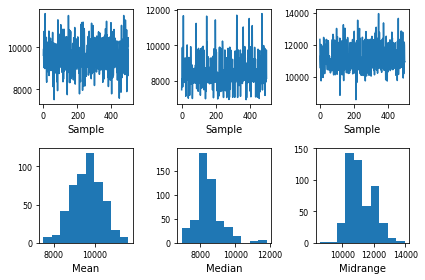

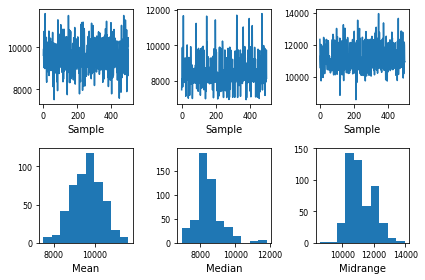

In [ ]:
## Bootstrap plotting for man
pd.plotting.bootstrap_plot(df[df['Gender']=='M']['Purchase'].sample(1000))

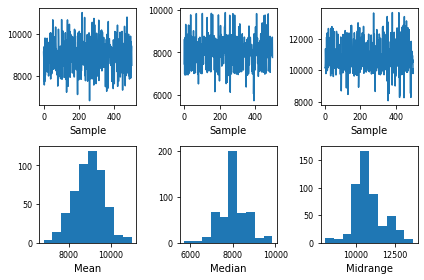

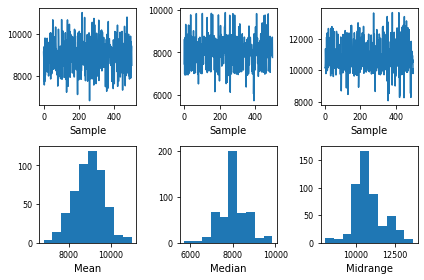

In [ ]:
## Bootstrap plotting for females
pd.plotting.bootstrap_plot(df[df['Gender']=='F']['Purchase'].sample(1000))


In [ ]:
## Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Looking at all the methods, I would not say that the confidence interval of average spending overlaps.

Infact the average spending distribution of varied sampling suggest woman spends less taking into consideration the poplulation mean.

Walmart can possibly look into this conclusion and see if they could help increase average monthly spends by woman, or if they would like to target man with marketing more similar product as they spend more.

In [ ]:
## 4) Results when the same activity is performed for Married vs Unmarried

In [ ]:
print(f"The average spent/mean spent by Marital Status 0 = {round(df[df['Marital_Status']==0]['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Marital Status 1 = {round(df[df['Marital_Status']==1]['Purchase'].mean(),2)}")

The average spent/mean spent by Marital Status 0 = 9265.91
The average spent/mean spent by Marital Status 1 = 9261.17


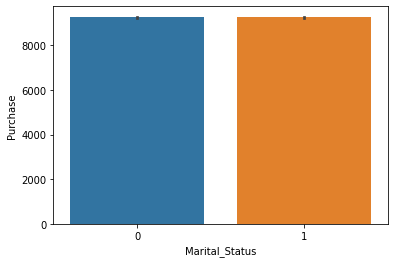

In [ ]:
sns.barplot(df, x='Marital_Status', y='Purchase', estimator = np.mean)
plt.show()

In [ ]:
## Finding confidence interval using statsmodels.stats.api 
import statsmodels.stats.api as sms 

c = df[df['Marital_Status']==0]['Purchase']
d  = df[df['Marital_Status']==1]['Purchase']

print(f"Confidence interval mean of expenses by Marital Status 0: {sms.DescrStatsW(c).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Marital Status 1: {sms.DescrStatsW(d).tconfint_mean()}")

Confidence interval mean of expenses by Marital Status 0: (9248.616353737028, 9283.198884105985)
Confidence interval mean of expenses by Marital Status 1: (9240.460315792989, 9281.888832371758)


In [ ]:
## Finding confidence interval using z score taking sample as 1000 ((Calculating at 95% of interval))

## For Marital_Status 0
sample_0 = df[df['Marital_Status']==0]['Purchase'].sample(1000)
sample_0_mean = sample_0.mean()
sample_0_std = sample_0.std()
margin_of_error_0 = 1.959963984540054*sample_0_std/np.sqrt(len(sample_0)) ## z score is calculated with stats.norm.ppf(.975)
confidence_interval_0 = (sample_0_mean-margin_of_error_0, sample_0_mean+margin_of_error_0)

## For Marital_Status 1
sample_1 = df[df['Marital_Status']==1]['Purchase'].sample(1000)
sample_1_mean = sample_1.mean()
sample_1_std = sample_1.std()
margin_of_error_1 = 1.959963984540054*sample_1_std/np.sqrt(len(sample_1))
confidence_interval_1 = (sample_1_mean-margin_of_error_1, sample_1_mean+margin_of_error_1)

##Printing the value

print(f"Confidence interval mean of expenses by Marital Status 0: {confidence_interval_0}")
print(f"Confidence interval mean of expenses by Marital Status 1: {confidence_interval_1}")

Confidence interval mean of expenses by Marital Status 0: (8964.577807959504, 9582.564192040496)
Confidence interval mean of expenses by Marital Status 1: (8970.971802318818, 9590.922197681182)


In [ ]:
## Using Bootstarp method (np.percentile)  (Calculating at 95% of interval)

## For Marital Status 0
sample_0 = df[df['Marital_Status']==0]['Purchase']
bootstrap_0 = []
for i in range (1000):
  sample0 = np.random.choice(sample_0, size=1000) 
  sample_mean_0 = np.mean(sample0)
  bootstrap_0.append(sample_mean_0)

## For Marital Status 1
sample_1 = df[df['Marital_Status']==1]['Purchase']
bootstrap_1 = []
for i in range (1000):
  sample1 = np.random.choice(sample_1, size=1000) 
  sample_mean_1 = np.mean(sample1)
  bootstrap_1.append(sample_mean_1)

  ## Printing result

print(f"Confidence interval mean of expenses by Marital Status 0: {np.percentile(bootstrap_0,[2.5, 97.5])}")
print(f"Confidence interval mean of expenses by Marital Status 1: {np.percentile(bootstrap_1,[2.5, 97.5])}")

Confidence interval mean of expenses by Marital Status 0: [8957.661175 9618.105375]
Confidence interval mean of expenses by Marital Status 1: [8942.596175 9597.988575]


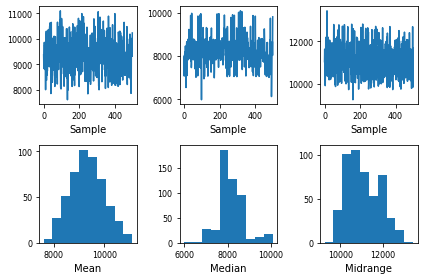

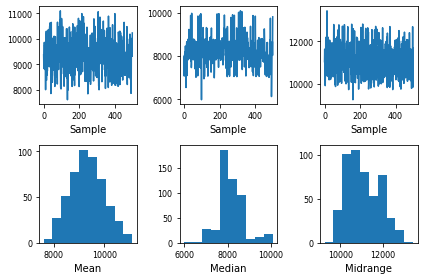

In [ ]:
## For Marital Status 0
pd.plotting.bootstrap_plot(df[df['Marital_Status']==0]['Purchase'].sample(1000))

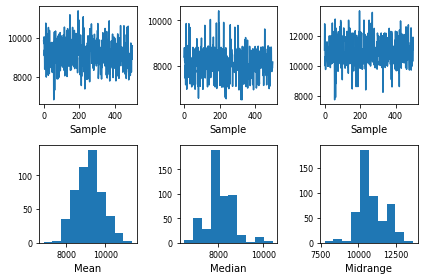

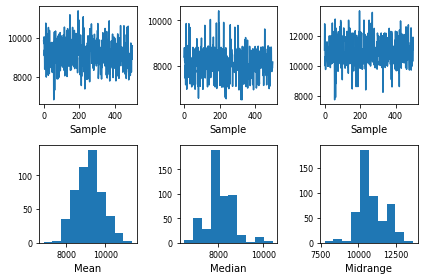

In [ ]:
## For Marital Status 1
pd.plotting.bootstrap_plot(df[df['Marital_Status']==1]['Purchase'].sample(1000))

Looking at the above data, I would say the confidence interval for mean spend overlaps in case of both the Marital Status

In [ ]:
## Results when the same activity is performed for Age

In [ ]:
print(f"The average spent/mean spent by Age Group 0-17 = {round(df[df['Age']=='0-17']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Age Group 18-25 = {round(df[df['Age']=='18-25']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Age Group 26-35 = {round(df[df['Age']=='26-35']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Age Group 36-45 = {round(df[df['Age']=='36-45']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Age Group 46-50 = {round(df[df['Age']=='46-50']['Purchase'].mean(),2)}")
print(f"The average spent/mean spent by Age Group 55+ = {round(df[df['Age']=='55+']['Purchase'].mean(),2)}")

The average spent/mean spent by Age Group 0-17 = 8933.46
The average spent/mean spent by Age Group 18-25 = 9169.66
The average spent/mean spent by Age Group 26-35 = 9252.69
The average spent/mean spent by Age Group 36-45 = 9331.35
The average spent/mean spent by Age Group 46-50 = 9208.63
The average spent/mean spent by Age Group 55+ = 9336.28


In [ ]:
## Finding confidence interval using statsmodels.stats.api 
import statsmodels.stats.api as sms 

p = df[df['Age']=='0-17']['Purchase']
q = df[df['Age']=='18-25']['Purchase']
r = df[df['Age']=='26-35']['Purchase']
s = df[df['Age']=='36-45']['Purchase']
t = df[df['Age']=='46-50']['Purchase']
u = df[df['Age']=='55+']['Purchase']

print(f"Confidence interval mean of expenses by Age Group 0-17 : {sms.DescrStatsW(p).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Age Group 18-25: {sms.DescrStatsW(q).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Age Group 26-35 : {sms.DescrStatsW(r).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Age Group 36-45: {sms.DescrStatsW(s).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Age Group 46-50 : {sms.DescrStatsW(t).tconfint_mean()}")
print(f"Confidence interval mean of expenses by Age Group 55+: {sms.DescrStatsW(u).tconfint_mean()}")

Confidence interval mean of expenses by Age Group 0-17 : (8851.941436361221, 9014.987844528727)
Confidence interval mean of expenses by Age Group 18-25: (9138.40756914702, 9200.919643375557)
Confidence interval mean of expenses by Age Group 26-35 : (9231.733560884022, 9273.647704855754)
Confidence interval mean of expenses by Age Group 36-45: (9301.669084404875, 9361.032305430872)
Confidence interval mean of expenses by Age Group 46-50 : (9163.08393647555, 9254.167458461105)
Confidence interval mean of expenses by Age Group 55+: (9269.295063935433, 9403.265854963376)


In [ ]:
## Finding confidence interval using z score taking sample as 1000 ((Calculating at 95% of interval))

## For Age Group 0-17
sample_0_17 = df[df['Age']=='0-17']['Purchase'].sample(1000)
sample_0_17_mean = sample_0_17.mean()
sample_0_17_std = sample_0_17.std()
margin_of_error_0_17 = 1.959963984540054*sample_0_17_std/np.sqrt(len(sample_0_17)) ## z score is calculated with stats.norm.ppf(.975)
confidence_interval_0_17 = (sample_0_17_mean-margin_of_error_0_17, sample_0_17_mean+margin_of_error_0_17)

## For Age Group 18-25
sample_18_25 = df[df['Age']=='18-25']['Purchase'].sample(1000)
sample_18_25_mean = sample_18_25.mean()
sample_18_25_std = sample_18_25.std()
margin_of_error_18_25 = 1.959963984540054*sample_18_25_std/np.sqrt(len(sample_18_25))
confidence_interval_18_25 = (sample_18_25_mean-margin_of_error_18_25, sample_18_25_mean+margin_of_error_18_25)

## For Age Group 26-35
sample_26_35 = df[df['Age']=='26-35']['Purchase'].sample(1000)
sample_26_35_mean = sample_26_35.mean()
sample_26_35_std = sample_26_35.std()
margin_of_error_26_35 = 1.959963984540054*sample_26_35_std/np.sqrt(len(sample_26_35))
confidence_interval_26_35 = (sample_26_35_mean-margin_of_error_26_35, sample_26_35_mean+margin_of_error_26_35)

## For Age Group 36-45
sample_36_45 = df[df['Age']=='36-45']['Purchase'].sample(1000)
sample_36_45_mean = sample_36_45.mean()
sample_36_45_std = sample_36_45.std()
margin_of_error_36_45 = 1.959963984540054*sample_36_45_std/np.sqrt(len(sample_36_45))
confidence_interval_36_45 = (sample_36_45_mean-margin_of_error_36_45, sample_36_45_mean+margin_of_error_36_45)

## For Age Group 46-50
sample_46_50= df[df['Age']=='46-50']['Purchase'].sample(1000)
sample_46_50_mean = sample_46_50.mean()
sample_46_50_std = sample_46_50.std()
margin_of_error_46_50 = 1.959963984540054*sample_46_50_std/np.sqrt(len(sample_46_50))
confidence_interval_46_50 = (sample_46_50_mean-margin_of_error_46_50, sample_46_50_mean+margin_of_error_46_50)

## For Age Group 55+
sample_55= df[df['Age']=='55+']['Purchase'].sample(1000)
sample_55_mean = sample_55.mean()
sample_55_std = sample_55.std()
margin_of_error_55 = 1.959963984540054*sample_55_std/np.sqrt(len(sample_55))
confidence_interval_55 = (sample_55_mean-margin_of_error_55, sample_55_mean+margin_of_error_55)

##Printing the value

print(f"Confidence interval mean of expenses by Age Group 0-17 : {confidence_interval_0_17}")
print(f"Confidence interval mean of expenses by Age Group 18-25: {confidence_interval_18_25}")
print(f"Confidence interval mean of expenses by Age Group 26-35 : {confidence_interval_26_35}")
print(f"Confidence interval mean of expenses by Age Group 36-45: {confidence_interval_36_45}")
print(f"Confidence interval mean of expenses by Age Group 46-50 : {confidence_interval_46_50}")
print(f"Confidence interval mean of expenses by Age Group 55+: {confidence_interval_55}")

Confidence interval mean of expenses by Age Group 0-17 : (8634.431173964345, 9270.610826035656)
Confidence interval mean of expenses by Age Group 18-25: (9004.781729020482, 9623.852270979516)
Confidence interval mean of expenses by Age Group 26-35 : (9124.303651862692, 9752.324348137308)
Confidence interval mean of expenses by Age Group 36-45: (9048.951006127456, 9672.014993872544)
Confidence interval mean of expenses by Age Group 46-50 : (8864.932034883781, 9478.209965116219)
Confidence interval mean of expenses by Age Group 55+: (8988.396679805652, 9597.803320194349)


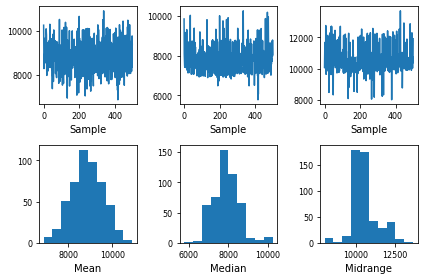

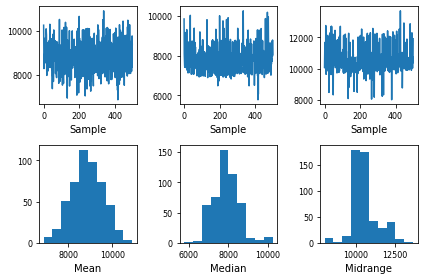

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='0-17']['Purchase'].sample(1000))

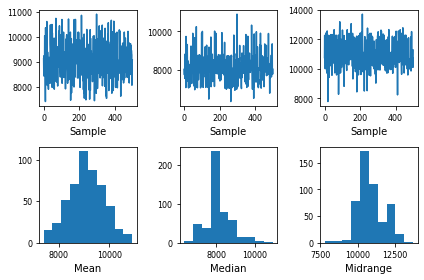

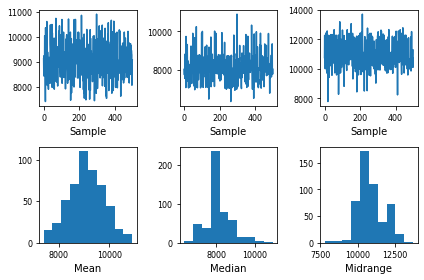

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='18-25']['Purchase'].sample(1000))

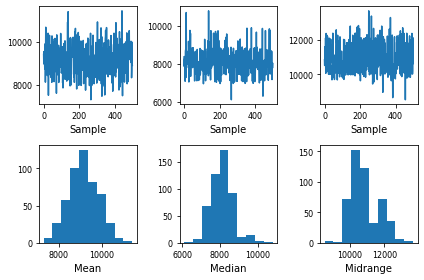

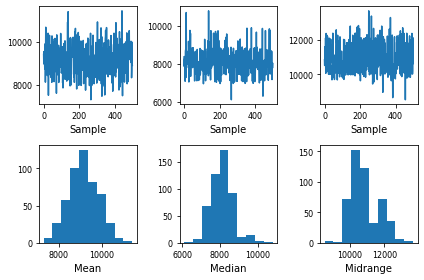

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='26-35']['Purchase'].sample(1000))

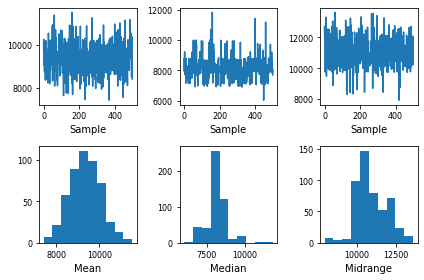

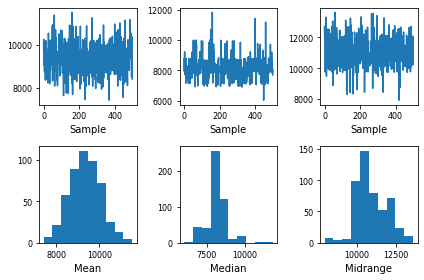

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='36-45']['Purchase'].sample(1000))

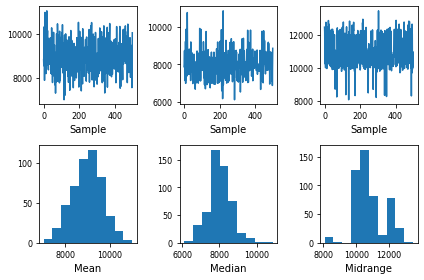

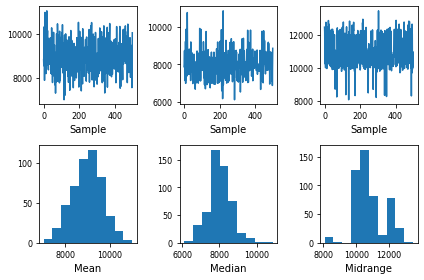

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='46-50']['Purchase'].sample(1000))

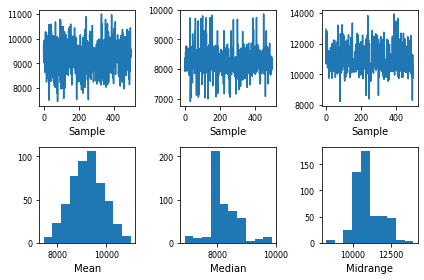

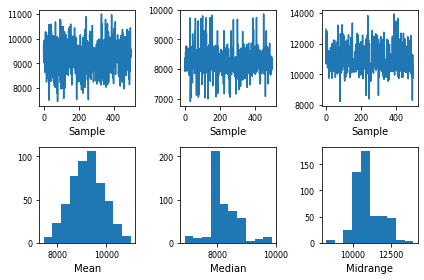

In [ ]:
pd.plotting.bootstrap_plot(df[df['Age']=='55+']['Purchase'].sample(1000))

Observation:

While taking random samples of size 1000 (as we are not taught how to take accurate samples), the confidence interval seems to overlap, however while looking at intervals using statsmodels.stats.api we can see see that the mean confidence interval does not overlap and the mean spend of agegroup 26-35 has the max confidence interval followed by 17-25. 

# Final Insights (10 Points) - Illustrate the insights based on exploration and CLT

In [ ]:
### Comments on the distribution of the variables and relationship between them

In [ ]:
df['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [ ]:
df['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [ ]:
df['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [ ]:
df['Occupation'].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [ ]:
df['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [ ]:
df['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370


In [ ]:
gender = ['M', 'F']
product_category = df['Product_Category'].sort_values().unique()
print("Probability of buying Products from different Product Category by Male and Female")
for i in product_category:
  for j in gender:
    
    print(f"P({i}/{j})= {round(len(df[(df['Product_Category']==i) & (df['Gender']==j)])/len(df[df['Gender']==j]),2)}")

Probability of buying Products from different Product Category by Male and Female
P(1/M)= 0.28
P(1/F)= 0.18
P(2/M)= 0.04
P(2/F)= 0.04
P(3/M)= 0.03
P(3/F)= 0.04
P(4/M)= 0.02
P(4/F)= 0.03
P(5/M)= 0.26
P(5/F)= 0.31
P(6/M)= 0.04
P(6/F)= 0.03
P(7/M)= 0.01
P(7/F)= 0.01
P(8/M)= 0.19
P(8/F)= 0.25
P(9/M)= 0.0
P(9/F)= 0.0
P(10/M)= 0.01
P(10/F)= 0.01
P(11/M)= 0.05
P(11/F)= 0.03
P(12/M)= 0.01
P(12/F)= 0.01
P(13/M)= 0.01
P(13/F)= 0.01
P(14/M)= 0.0
P(14/F)= 0.0
P(15/M)= 0.01
P(15/F)= 0.01
P(16/M)= 0.02
P(16/F)= 0.02
P(17/M)= 0.0
P(17/F)= 0.0
P(18/M)= 0.01
P(18/F)= 0.0
P(19/M)= 0.0
P(19/F)= 0.0
P(20/M)= 0.0
P(20/F)= 0.01


In [ ]:
marital = [0, 1]
product_category = df['Product_Category'].sort_values().unique()
print("Probability of buying Products from different Product Category given their Marital Status i.e (0,1)")
for i in product_category:
  for j in marital:
    
    print(f"P(Product Category{i}/ Marital Status {j})= {round(len(df[(df['Product_Category']==i) & (df['Marital_Status']==j)])/len(df[df['Marital_Status']==j]),2)}")

Probability of buying Products from different Product Category given their Marital Status i.e (0,1)
P(Product Category1/ Marital Status 0)= 0.26
P(Product Category1/ Marital Status 1)= 0.25
P(Product Category2/ Marital Status 0)= 0.04
P(Product Category2/ Marital Status 1)= 0.04
P(Product Category3/ Marital Status 0)= 0.04
P(Product Category3/ Marital Status 1)= 0.03
P(Product Category4/ Marital Status 0)= 0.02
P(Product Category4/ Marital Status 1)= 0.02
P(Product Category5/ Marital Status 0)= 0.28
P(Product Category5/ Marital Status 1)= 0.27
P(Product Category6/ Marital Status 0)= 0.04
P(Product Category6/ Marital Status 1)= 0.04
P(Product Category7/ Marital Status 0)= 0.01
P(Product Category7/ Marital Status 1)= 0.01
P(Product Category8/ Marital Status 0)= 0.2
P(Product Category8/ Marital Status 1)= 0.22
P(Product Category9/ Marital Status 0)= 0.0
P(Product Category9/ Marital Status 1)= 0.0
P(Product Category10/ Marital Status 0)= 0.01
P(Product Category10/ Marital Status 1)= 0.01
P

Observation:
Since most of the observation on disrtibution and variables is already covered in Question 3. However I calculated the probabilities to futher the insights. Below are my findings.

1) Male is most likely to Purchase the products.

2) Age Group 26-35 are more likely to purchase the product

3) Marital status as 0 are more likely to purchase the product

4) Someone from city B is more likely to purchase the product

5) Someone who has been staying in their current city for 1 years have 35% more chance of buying the product

6) Product Category 1 is more purchased. (Male purchasing product Category 1 is 28% likely while female 18%, Marital status 0 is 26& and Marital status 1 is 25%)

In [ ]:
##  Comments for each univariate and bivariate plots


#  Since I have plotted most of univariate and bivariate plots and shared insights on question 3. Let me try to explore a little more on data and try find
# some new insights

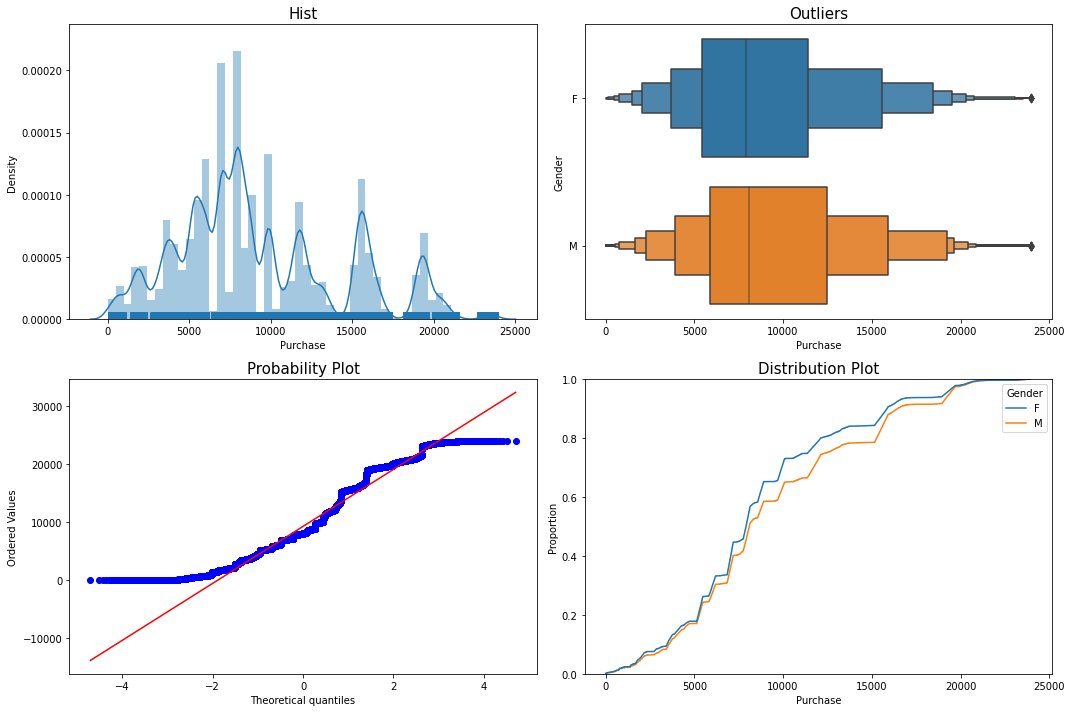

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.distplot(df['Purchase'], rug=True, ax = ax[0,0])
ax[0,0].set_title('Hist', fontsize=15)


sns.boxenplot(x=df['Purchase'],y=df['Gender'], data=df,ax=ax[0,1])
ax[0,1].set_title('Outliers', fontsize=15)


scipy.stats.probplot(df['Purchase'], plot=ax[1][0])
ax[1, 0].set_title('Probability Plot', fontsize=15)


sns.ecdfplot(x=df['Purchase'],hue=df['Gender'], data=df,ax=ax[1,1])
ax[1, 1].set_title('Distribution Plot', fontsize=15)

plt.tight_layout()
plt.show()

Observation:
1) Men spends more than woman per transaction (The distribution plot shows the data of woman- less than particular value).

2) We can also observe from Probability plot the deivation in empirical probability and theoretical probabilities


In [ ]:
pd.pivot_table(data=df, index='Gender', values='Purchase', columns=['Marital_Status'], 
               aggfunc='mean', margins=True, margins_name='Total').style.background_gradient(cmap='magma',axis=None, vmin=8000, vmax=9500)

Marital_Status,0,1,Total
Gender,,,
F,8679.845815,8810.249789,8734.565765
M,9453.756740,9413.817605,9437.526040
Total,9265.907619,9261.174574,9263.968713


Male given Marital Status 0 have spend more on an average

In [ ]:
pd.pivot_table(data=df, index='Age', values='Purchase', columns=['Gender'], aggfunc='mean',margins=True, margins_name='Total')\
.sort_values(by='Age').style.background_gradient(cmap='magma',axis=None, vmin=7999, vmax=9999)

Gender,F,M,Total
Age,,,
0-17,8338.771985,9235.173670,8933.464640
18-25,8343.180201,9440.942971,9169.663606
26-35,8728.251754,9410.337578,9252.690633
36-45,8959.844056,9453.193643,9331.350695
46-50,8842.098947,9357.471509,9208.625697
51-55,9042.449666,9705.094802,9534.808031
55+,9007.036199,9438.195603,9336.280459
Total,8734.565765,9437.526040,9263.968713


Males consuming in all of age bands is quite more than females, furthermore we can notice that the consuming of females is increasing by getting older upto age 55

In [ ]:
pd.pivot_table(data=df, index='Age', values='Purchase', columns=['City_Category'], aggfunc='mean', margins=True, margins_name='Total')\
.style.background_gradient(cmap='magma', vmin=7999, vmax=9999)

City_Category,A,B,C,Total
Age,,,,
0-17,8615.110456,8917.295308,9059.503299,8933.464640
18-25,8833.734084,9031.706985,9696.570919,9169.663606
26-35,8952.503004,9149.193178,9835.388993,9252.690633
36-45,8990.333997,9107.901067,9882.012654,9331.350695
46-50,8348.526752,9247.927129,9533.184023,9208.625697
51-55,9508.505001,9340.911392,9780.380806,9534.808031
55+,8485.945424,9803.560635,9385.316939,9336.280459
Total,8911.939216,9151.300563,9719.920993,9263.968713


In [ ]:
pd.pivot_table(data=df, index='Age', values='Purchase', columns=['City_Category','Gender'], aggfunc='mean')\
.style.background_gradient(cmap='magma',vmin=7999, vmax=9999)

We can see males dominates purchase in respect to all age groups except for age 51-55, where women seems to spends more on an average in all the city Category which contributes greatly, to overall average spending.

Women from City A spends more on an average and men from City B spends more on an average

In [ ]:
## Comments on different variables when generalizing it for Population

**Confidence Interval in variables: Using (statsmodels.stats.api) as its more accurate**

1) Confidence interval mean of expenses by Marital Status 0: (9248.616353737028, 9283.198884105985)

2) Confidence interval mean of expenses by Marital Status 1: (9240.460315792989, 9281.888832371758)

3)Confidence interval mean of expenses by Age Group 0-17 : (8851.941436361221, 9014.987844528727)

4)Confidence interval mean of expenses by Age Group 18-25: (9138.40756914702, 9200.919643375557)

5)Confidence interval mean of expenses by Age Group 26-35 : (9231.733560884022, 9273.647704855754)

6)Confidence interval mean of expenses by Age Group 36-45: (9301.669084404875, 9361.032305430872)

7)Confidence interval mean of expenses by Age Group 46-50 : (9163.08393647555, 9254.167458461105)

8)Confidence interval mean of expenses by Age Group 55+: (9269.295063935433, 9403.265854963376)

9)Confidence interval mean of expenses by men is: (9422.019402055814, 9453.032678888716)

10) Confidence interval mean of expenses by women is: (8709.21132117373, 8759.92020913722)



# Recommendations

1) Man seem to spend more money while purchasing the product and also the probability of man purchasing a any product seems rather high. We can leviate this information and offer interesting coupons and discount, probably hosts events for men.

2) We have also seen people staying for one years seems to have purchase more on an average/spent more on an average which brings us to question what happens to those with 1+ years, why the average spend decreases, is it the customer experience, is the quality of product or price value. Walmart can conduct survey and see if there are other factors that influence average spend, rather than just cities, age group, marital status, occupation

3) When considering the spend with regards to age group its seen that age group of 45-50 in both males and females are more likely to spend more on an average. Walmart can promote this age group, probably offer discounts, market more similar products that they purchase

4) City C seems to have more average spend, Walmart can leverage this information and probably introduce ease of shopping or shuttle service to them which may help more frequent visits and purchases. Or may be take city C as standard and see why other cities are spending little less, is it because of other external factors (Commute, location of the store, the traffic they encounter, price factor comparing to nearby stores).

5) People with occupation 4 and other with similar purchasing power can be given corporate coupons or reward points, as they seem to spend more on an average